# FB 08 - F-Praktikum Physik Materialien - 57 Magnetic Resonance

## Fourier Transform and its application in NMR

In this section, the basics of the Fourier Transform (FT) are introduced with simple words. For more detailed descriptions, please check this nice book with animations https://www.cis.rit.edu/htbooks/nmr/chap-5/chap-5.htm#5.3 .

### Bridge between domains

We are used to the time domain. 
When looking at a signal, we often plot its amplitude over time, like Fig.(50Hz-example)(a). 
<!-- . In Fig.(50Hz-example)(a), we show a sine-wave signal which can be described by  -->
<!-- $s(t) = \sin(2\pi\times50\,t + \frac{\pi}{4})\,.$ -->
However, when dealing with periodic signals (which is very frequent in NMR/MRI experiments), it is easier if we view signals in the **frequency domain**. 

What is frequency domain? Since we know in time domain we plot "signal amplitudes at different times", then we can already infer that, in frequency domain we plot "signal amplitudes at different frequencies". For the signal we show in Fig.(50Hz-example)(a), it would be simply described as a 50-Hz signal (with an  initial phase) in the frequency domain [see Fig.(50Hz-example)(b)]. The bridge between two domains is the Fourier transform. 

**Figure: 50Hz-example**

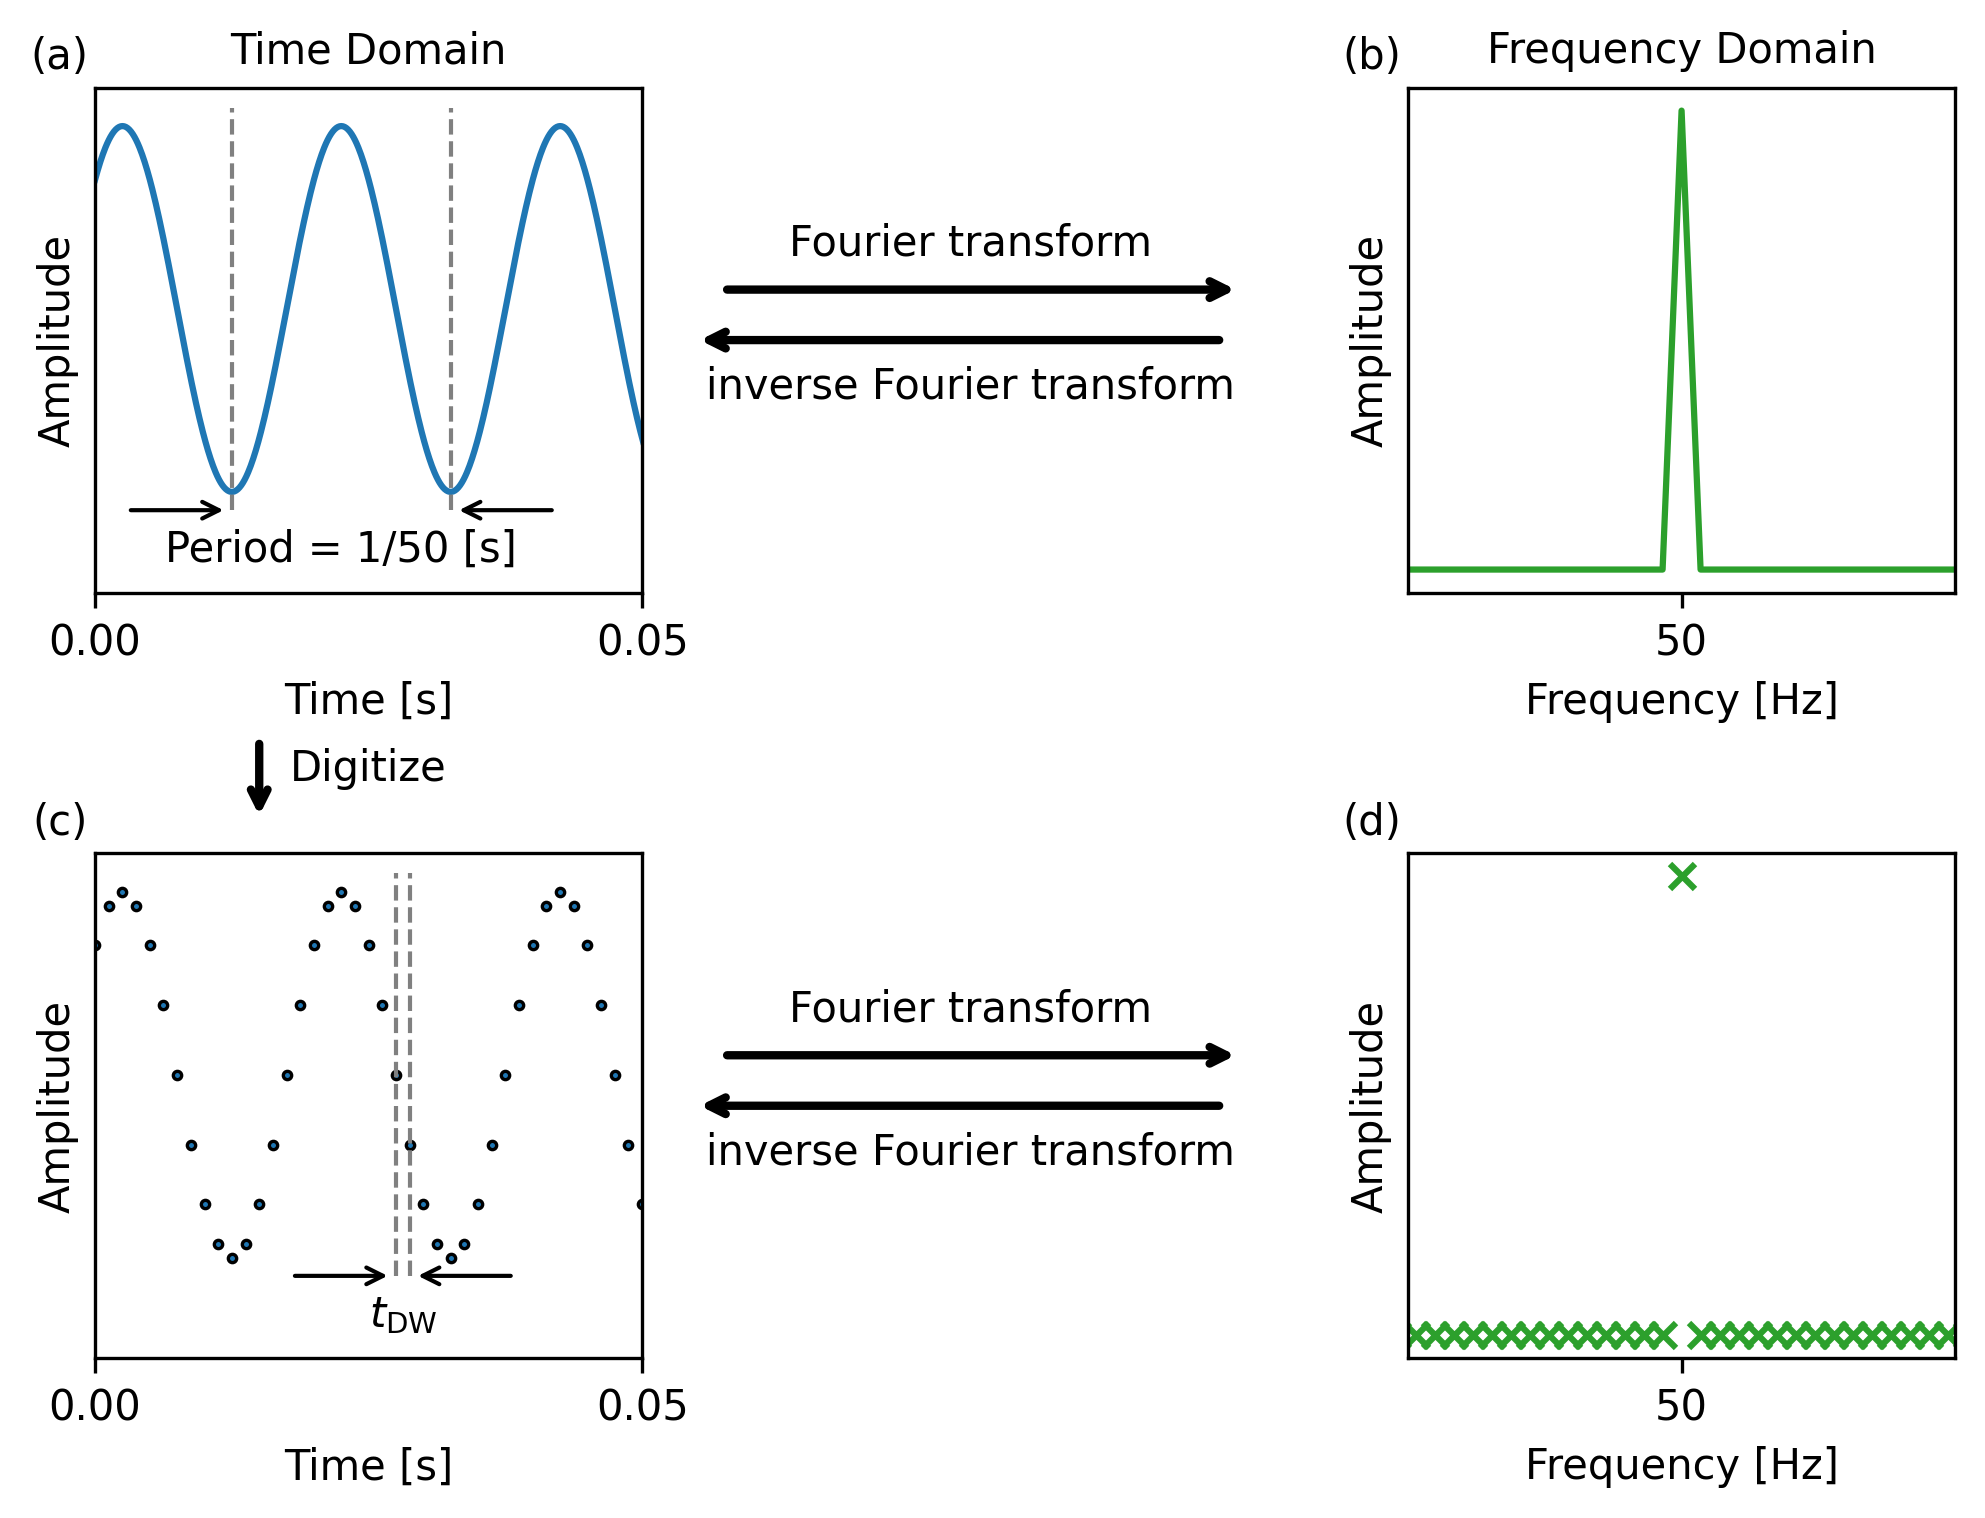

In [217]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Time-domain parameters
DW = 1 / 800 /16 # dwell time
SI = 256 * 16 # size i.e. number of sampled points
timeStamp_smooth = DW * np.arange(SI)
initial_phase = np.pi / 4
s_t_smooth = np.sin(2 * np.pi * 50 * timeStamp_smooth + initial_phase)

# Time-domain parameters
DW = 1 / 800  # dwell time
SI = 128  # size i.e. number of sampled points
timeStamp = DW * np.arange(SI)
initial_phase = np.pi / 4
s_t = np.sin(2 * np.pi * 50 * timeStamp + initial_phase)

# Frequency-domain computation
n = len(s_t)
frequencies = np.fft.fftfreq(n, d=DW)
fft_vals = np.fft.fft(s_t)
fft_vals_shifted = np.fft.fftshift(fft_vals)
frequencies_shifted = np.fft.fftshift(frequencies)

amplitude = np.abs(fft_vals_shifted)
phase = np.angle(fft_vals_shifted)

# Plotting setup
plt.rc("font", size=10)  # font size for all figures
plt.rc("figure", titlesize=10)  # Figure title
plt.rc("axes", titlesize=10)  # Axes title

fig = plt.figure(figsize=(8, 5.5), dpi=300)  # initialize a figure
gs = gridspec.GridSpec(
    nrows=3, ncols=3, width_ratios=[1, 1, 1], height_ratios=[1, 0.5, 1]
)  # create grid for multiple figures

# fix the margins
wspace = 0.2
hspace = 0.01
fig.subplots_adjust(wspace=wspace, hspace=hspace)
ax00 = fig.add_subplot(gs[0, 0])
ax01 = fig.add_subplot(gs[0, 1])
ax02 = fig.add_subplot(gs[0, 2])
ax10 = fig.add_subplot(gs[1, 0])
ax11 = fig.add_subplot(gs[1, 1])
ax12 = fig.add_subplot(gs[1, 2])
ax20 = fig.add_subplot(gs[2, 0])
ax21 = fig.add_subplot(gs[2, 1])
ax22 = fig.add_subplot(gs[2, 2])
axs = [ax00, ax01, ax02, ax10, ax11, ax12, ax20, ax21, ax22]

# --- Left plot: Time-domain signal ---
axs[0].plot(timeStamp_smooth, s_t_smooth, color="tab:blue")

arrow_left = (2 * np.pi * 0 + 3 * np.pi / 2 - initial_phase) / (2 * np.pi * 50)
arrow_right = (2 * np.pi * 0 + 2 * np.pi + 3 * np.pi / 2 - initial_phase) / (
    2 * np.pi * 50
)

axs[0].vlines(
    x=arrow_left, ymin=-1.1, ymax=1.1, color="grey", linestyle="--", linewidth=1
)
axs[0].vlines(
    x=arrow_right, ymin=-1.1, ymax=1.1, color="grey", linestyle="--", linewidth=1
)

axs[0].annotate(
    "",
    xy=(arrow_left, -1.1),
    xytext=(arrow_left - 0.01, -1.1),
    arrowprops=dict(arrowstyle="->", lw=1),
)
axs[0].annotate(
    "",
    xy=(arrow_right, -1.1),
    xytext=(arrow_right + 0.01, -1.1),
    arrowprops=dict(arrowstyle="->", lw=1),
)
axs[0].text(
    (arrow_left + arrow_right) / 2, -1.2, "Period = 1/50 [s]", ha="center", va="top"
)

axs[0].set_xticks([0, 0.05])
# axs[0].set_yticks([-1, 0, 1])
axs[0].set_yticks([])
axs[0].set_title("Time Domain")
axs[0].set_xlabel("Time [s]")
axs[0].set_ylabel("Amplitude")
axs[0].set_xlim(0, 0.05)
axs[0].set_ylim(bottom=-1.55)

# --- Middle plots: Arrow with transform labels ---
for ax in [axs[1], axs[7]]:
    ax.axis("off")
    ax.annotate(
        "", xy=(0.9, 0.6), xytext=(-0.06, 0.6), arrowprops=dict(arrowstyle="->", lw=2)
    )
    ax.annotate(
        "", xy=(0.87, 0.5), xytext=(-0.11, 0.5), arrowprops=dict(arrowstyle="<-", lw=2)
    )
    ax.text(0.4, 0.65, "Fourier transform", ha="center", va="bottom")
    ax.text(0.4, 0.45, "inverse Fourier transform", ha="center", va="top")

# --- Right plot: Frequency-domain representation ---
axs[2].plot(
    frequencies_shifted,
    amplitude,
    # marker="x",
    color="tab:green",
    label="Amplitude",
)
axs[2].set_xticks([50])
# axs[2].set_yticks([0, 60])
axs[2].set_yticks([])
axs[2].set_xlim(-40, 140)
axs[2].set_xlabel("Frequency [Hz]")
axs[2].set_ylabel("Amplitude")
axs[2].set_title("Frequency Domain")

# # Add phase on a twin y-axis
# ax2 = axs[2].twinx()
# ax2.plot(frequencies_shifted, phase, "r--", label="Phase")
# ax2.set_ylabel("Phase [rad]", color="red")
# ax2.tick_params(axis="y", labelcolor="red")


for ax in [axs[3]]:
    ax.axis("off")
    ax.annotate(
        "", xy=(0.3, 0.1), xytext=(0.3, 0.45), arrowprops=dict(arrowstyle="->", lw=2)
    )
    ax.text(0.5, 0.4, "Digitize", ha="center", va="top")

axs[4].axis("off")
axs[5].axis("off")

# --- Left plot: digital time-domain signal ---
axs[6].scatter(
    timeStamp,
    s_t,
    color="tab:blue",
    edgecolors="k",
    linewidths=0.8,
    marker="o",
    s=4,
)

ax20_vline_left = (2 * np.pi * 1 + 1 * np.pi - initial_phase) / (2 * np.pi * 50) 
ax20_vline_right = ax20_vline_left + DW

axs[6].vlines(
    x=ax20_vline_left, ymin=-1.1, ymax=1.1, color="grey", linestyle="--", linewidth=1
)
axs[6].vlines(
    x=ax20_vline_right, ymin=-1.1, ymax=1.1, color="grey", linestyle="--", linewidth=1
)

axs[6].annotate(
    "",
    xy=(ax20_vline_left, -1.1),
    xytext=(ax20_vline_left - 0.01, -1.1),
    arrowprops=dict(arrowstyle="->", lw=1),
)
axs[6].annotate(
    "",
    xy=(ax20_vline_right, -1.1),
    xytext=(ax20_vline_right + 0.01, -1.1),
    arrowprops=dict(arrowstyle="->", lw=1),
)
axs[6].text(
    (ax20_vline_left + ax20_vline_right) / 2,
    -1.2,
    "$t_\\mathrm{DW}$",
    ha="center",
    va="top",
)

axs[6].set_xticks([0, 0.05])
# axs[0].set_yticks([-1, 0, 1])
axs[6].set_yticks([])
# axs[6].set_title("Time Domain")
axs[6].set_xlabel("Time [s]")
axs[6].set_ylabel("Amplitude")
axs[6].set_xlim(0, 0.05)
axs[6].set_ylim(bottom=-1.55)

# --- Right plot: Frequency-domain representation ---
axs[8].scatter(
    frequencies_shifted,
    amplitude,
    marker="x",
    color="tab:green",
    label="Amplitude",
)
axs[8].set_xticks([50])
# axs[2].set_yticks([0, 60])
axs[8].set_yticks([])
axs[8].set_xlim(-40, 140)
axs[8].set_xlabel("Frequency [Hz]")
axs[8].set_ylabel("Amplitude")
# axs[8].set_title("Frequency Domain")

# # Add phase on a twin y-axis
# ax2 = axs[2].twinx()
# ax2.plot(frequencies_shifted, phase, "r--", label="Phase")
# ax2.set_ylabel("Phase [rad]", color="red")
# ax2.tick_params(axis="y", labelcolor="red")

letters = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)", "(h)", "(i)"]
for i, ax in enumerate([axs[0], axs[2], axs[6], axs[8]]):
    # xleft, xright = ax.get_xlim()
    # ybottom, ytop = ax.get_ylim()
    ax.text(
        -0.013,
        1.02,
        s=letters[i],
        transform=ax.transAxes,
        ha="right",
        va="bottom",
        color="k",
    )

plt.show()


### Fourier transform in a digital and discrete world

Nowadays, we mostly get digital signals from devices, instead of analog ones. Digital signals are discrete. They are usually obtained by sampling the readout by a constant dwell time. An example of digital signal sampled by dwell time $t_\mathrm{DW}$ is shown in Fig.(50Hz-example)(c). When transformed to the frequency domain, the signal is also discrete. 

For a time-domain signal of length $N$ $x = [x_0, x_1, ..., x_{N-1}]^\top$, its discrete Fourier transform (DFT) is:
$$
X_k = \sum_{n=0}^{N-1} x_n \cdot \exp\left(-2\pi i \frac{k}{N} n \right), \quad k = 0, 1, ..., N-1
$$

This can be written as:

$$
\mathbf{X} = \mathbf{F} \cdot \mathbf{x},
$$

where **$\mathbf{F}$** is the **DFT matrix** with elements:

$$
F_{k,n} = \exp\left(-2\pi i\frac{ k}{N} n \right)\,,
$$

or

$$
F = \begin{bmatrix}
1 & 1 & 1 & \cdots & 1 \\
1 & \omega & \omega^2 & \cdots & \omega^{N-1} \\
1 & \omega^2 & \omega^4 & \cdots & \omega^{2(N-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & \omega^{N-1} & \omega^{2(N-1)} & \cdots & \omega^{(N-1)(N-1)}
\end{bmatrix}\,,
$$
where $\omega = e^{-2\pi i / N}$. 

Therefore, the DFT can be written as:
$$
\mathbf{X} = \mathbf{F} \cdot \mathbf{x} = 
\begin{bmatrix}
1 & 1 & 1 & \cdots & 1 \\
1 & \omega & \omega^2 & \cdots & \omega^{N-1} \\
1 & \omega^2 & \omega^4 & \cdots & \omega^{2(N-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & \omega^{N-1} & \omega^{2(N-1)} & \cdots & \omega^{(N-1)(N-1)}
\end{bmatrix}
\begin{bmatrix}
x_0  \\
x_1 \\
x_2  \\
\vdots \\
x_{N-1}
\end{bmatrix}
=
\begin{bmatrix}
X_0  \\
X_1 \\
X_2  \\
\vdots \\
X_{N-1}
\end{bmatrix}
\,.
$$

Here we do not dig deep into the rabbit hole of mathmathicas, but rather focus on the physical meaning of the formula. 

If we assume that $\mathbf{x} =\{x_n\}$ is a sine-wave signal
$$
x_n = \cos(2\pi f n)\,,\,f=0, \quad n = 0, 1, ..., 7
$$
<!-- \frac{1}{8}, \frac{1}{4}\text{ or } \frac{3}{8}\,, -->
we will find that when frequency $f=0$, only $X_0$ in $\mathbf{X}$ is non-zero. This means that $X_0$, computed by $[1,\,\cdots,\,1][x_0,\,\cdots,\,x_{N-1}]^\top$, indicates the amplitude of $f=0$ component in the signal. 

You can try to compute the values of $\mathbf{X}$ when $f=\frac{1}{8}, \frac{1}{4}\text{ or } \frac{3}{8}$, then you can find out which elements in $\mathbf{X}$ correspond to the amplitude of signals of these frequencies. A quick conclusion we can find in this example is that, the calculation of the Fourier transform is extracting the amplitudes of signals of different frequencies. 

Questions to think yourself: 

1. If $x_n = \cos(2\pi f n+\phi)$, what do we get with the Fourier transform? (It is about phase). 
2. What do we get when $f$ is different from the values mentioned above? Discuss cases where $f<=1/2$ and when $f>1/2$. 

TODO:

a TLDR part? A summary at the beginning? 
simple text on 1D MRI. 
2D MRI in the appendix. this should be arranged in a clean and robust way
highlight the key points of the lab course. spend less text on indirectly-related text
key points include: zeeman (not important after students know Zeeman gives the signal), larmor frequency, RCF, T1 and T2, FT with simple words (less formulas. students need to know: what is FT? what does it do? aliasing. convolution. and more...?i do not remember check Peter'slecture notes.)
log in world press and edit


[-0.5   -0.375 -0.25  -0.125  0.     0.125  0.25   0.375]
[-1.66533454e-16+0.00000000e+00j  1.96261557e-17+3.33644647e-16j
  3.96274378e+00-5.44666596e-01j -1.96261557e-17+3.33644647e-16j
  1.66533454e-16+0.00000000e+00j -1.96261557e-17-3.33644647e-16j
  3.96274378e+00+5.44666596e-01j  1.96261557e-17-3.33644647e-16j]


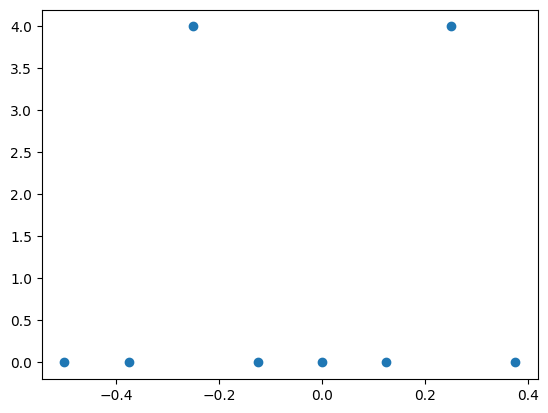

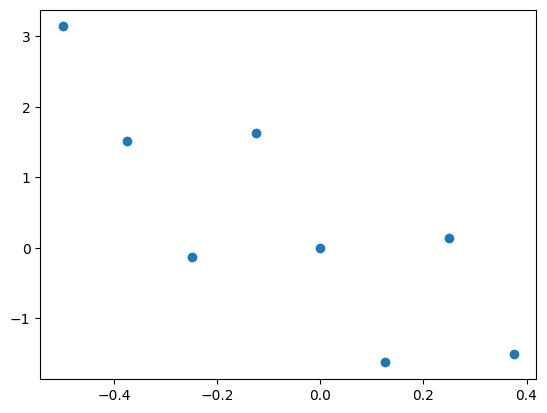

In [252]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


timeStamp = np.arange(8)

# f = 0
# f=1/8
f = 2 / 8
# f = 3 / 8
s_t = np.cos(2*np.pi*f*timeStamp+np.pi/23)


# Frequency-domain computation
n = len(s_t)
frequencies = np.fft.fftfreq(n, d=1)
fft_vals = np.fft.fft(s_t)
fft_vals_shifted = np.fft.fftshift(fft_vals)
frequencies_shifted = np.fft.fftshift(frequencies)

amplitude = np.abs(fft_vals_shifted)
phase = np.angle(fft_vals_shifted)
print(frequencies_shifted)
print(fft_vals_shifted)
plt.scatter(frequencies_shifted, amplitude)
plt.show()
plt.scatter(frequencies_shifted, phase)
plt.show()

# 1) Fourier Series
**Fourier Theorem: (Synthesis equation)**



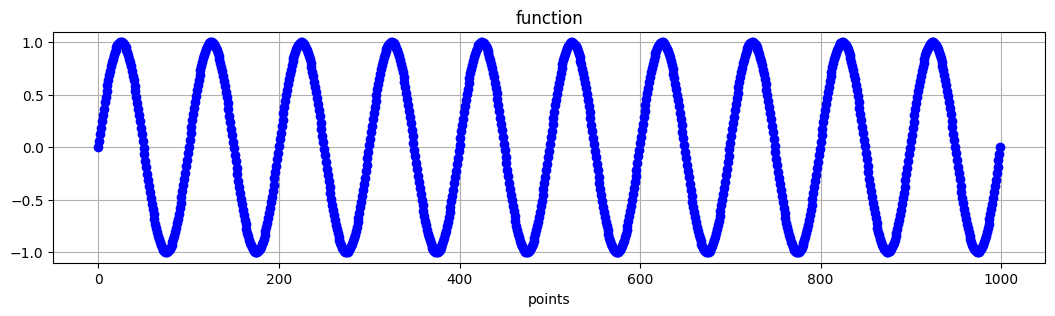

In [ ]:

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(12.8,3)
import numpy as np

#input parameters
points=1000      #number of points
width = 10      #width of function
offset =0        #offset from center

#define Heaviside function
f = np.zeros(points)  
w=int(points/2-width/2+offset)   #set function in center with value =1 for width points
f[w:w+int(width)-1]=1
timeStamp=np.linspace(0,np.pi*2,points)
f=np.sin(width*(timeStamp-offset))
#plot
plt.plot(f,'bo-')
plt.xlabel("points")
plt.title('function')
plt.grid(True)
plt.show()

We now define a linear axis $t$ of length $points$ but running from $-period/2 = -T/2 = -\pi$ to $period/2 = T/2 = \pi$.<br>
Then the Fourier coefficients $a_n$ and $b_n$ are calculated and summed up to represend the function $f$.<br>

**TASK**
1) vary $n$ (modify the $show$-parameter accordingly
2) change the input function 

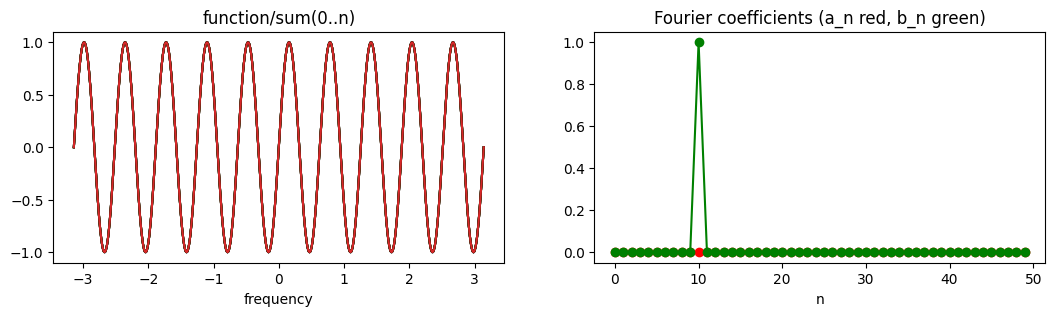

In [ ]:
T=2*np.pi
timeStamp=np.linspace(-T/2,T/2,points)

n=50   #number of coefficients used
show=10  #plot every showth plot of them

a=np.zeros(n)
b=np.zeros(n)
a[0]=2/points*np.sum(f)
SR=a[0]/2
figure, (ax1,ax2) = plt.subplots(1,2) 
for i in range(1,n):
    a[i]=2/points*np.sum(f*np.cos(i*timeStamp))
    b[i]=2/points*np.sum(f*np.sin(i*timeStamp))
    SR=SR+a[i]*np.cos(i*timeStamp)+b[i]*np.sin(i*timeStamp)
    if i%show ==0:
        ax1.plot(timeStamp,f,'k')
        ax1.plot(timeStamp,SR)
        ax1.set(xlabel='frequency')
        ax1.set_title('function/sum(0..n)')
        plt.show
ax2.plot(a,'ro-')
ax2.plot(b,'go-')
ax2.set(xlabel='n')
ax2.set_title('Fourier coefficients (a_n red, b_n green)')
plt.show()

It is convenient to express the Fourier-coefficients $a_n$ and $b_n$ in **complex notation**:<br>
\begin{equation}
f(t) = \sum\limits_{n=-\infty}^{\infty} c_n \exp\left(i\omega n\;t\right)   
\end{equation}

\begin{equation}
\text{with} \quad \sin(nt) = \frac{1}{2i} \left[e^{+int}-e^{-int} \right] \quad \text{and} \quad \cos(nt) = \frac{1}{2} \left[e^{+int}+e^{-int} \right]
\end{equation}

\begin{equation}
\text{hence:} \quad c_n = \frac{1}{2} \left(a_n - ib_n\right) = \frac{1}{T} \int\limits_{-T/2}^{T/2} f(t)\exp\left(-in\omega\;t\right)
\end{equation}

**where $n$ can be positive, negative and zero!**

